In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BTS_Data_2018_2024.csv')
df.head()

<ipython-input-2-469e132fd29e>:1: DtypeWarning: Columns (11,13,86,93,94,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BTS_Data_2018_2024.csv')


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [ ]:
df1 = df[['Month', 'FlightDate','Flight_Number_Operating_Airline', 'Tail_Number', 'IATA_Code_Operating_Airline', 'Origin', 'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName']].copy()
df1.head()

,Month,FlightDate,Flight_Number_Operating_Airline,Tail_Number,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName
0,1,2024-01-14,4432,N535GJ,G7,MHT,"Manchester, NH",New Hampshire,EWR,"Newark, NJ",New Jersey
1,1,2024-01-14,4430,N535GJ,G7,IAD,"Washington, DC",Virginia,EWR,"Newark, NJ",New Jersey
2,1,2024-01-14,4429,N535GJ,G7,EWR,"Newark, NJ",New Jersey,MHT,"Manchester, NH",New Hampshire
3,1,2024-01-14,4428,N547GJ,G7,STL,"St. Louis, MO",Missouri,ORD,"Chicago, IL",Illinois
4,1,2024-01-14,4427,N504GJ,G7,STL,"St. Louis, MO",Missouri,IAD,"Washington, DC",Virginia


In [ ]:
operating_airline_dir = {'WN' : 'Southwest Airlines Co', 'AA' : 'American Airlines Inc.', 'DL' : 'Delta Air Lines Inc.', 'UA' : 'United Air Lines Inc.', 'OO' : 'SkyWest Airlines Inc.', 'YX' : 'Republic Airline',
'MQ' : 'Simmons Airlines', 'NK' : 'Spirit Air Lines', 'B6' : 'JetBlue Airways', 'AS' : 'Alaska Airlines Inc.', '9E' : 'Endeavor Air Inc.', 'OH' : 'Comair Inc.', 'F9' : 'Frontier Airlines Inc.',
'G4' : 'Allegiant Air','PT' : 'Piedmont Airlines', 'YV' : 'Mesa Airlines Inc.', 'HA' : 'Hawaiian Airlines Inc.', 'C5' : 'CommuteAir LLC dba CommuteAir', 'QX': 'Horizon Air',
'G7' : 'GoJet Airlines LLC d/b/a United Express', 'ZW' : 'Air Wisconsin Airlines Corp'}

print(operating_airline_dir)

#value = {i for i in operating_airline_dir if operating_airline_dir[i]=="G7"}
print(operating_airline_dir['WN'])

{'WN': 'Southwest Airlines Co', 'AA': 'American Airlines Inc.', 'DL': 'Delta Air Lines Inc.', 'UA': 'United Air Lines Inc.', 'OO': 'SkyWest Airlines Inc.', 'YX': 'Republic Airline', 'MQ': 'Simmons Airlines', 'NK': 'Spirit Air Lines', 'B6': 'JetBlue Airways', 'AS': 'Alaska Airlines Inc.', '9E': 'Endeavor Air Inc.', 'OH': 'Comair Inc.', 'F9': 'Frontier Airlines Inc.', 'G4': 'Allegiant Air', 'PT': 'Piedmont Airlines', 'YV': 'Mesa Airlines Inc.', 'HA': 'Hawaiian Airlines Inc.', 'C5': 'CommuteAir LLC dba CommuteAir', 'QX': 'Horizon Air', 'G7': 'GoJet Airlines LLC d/b/a United Express', 'ZW': 'Air Wisconsin Airlines Corp'}
Southwest Airlines Co


In [ ]:
def operating_airline_func(value):
        ret_value = operating_airline_dir[value]
        return str(ret_value)

df1['operating_airline'] = df1['IATA_Code_Operating_Airline'].map(operating_airline_func)
display(df1.head())

,Month,FlightDate,Flight_Number_Operating_Airline,Tail_Number,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,operating_airline
0,1,2024-01-14,4432,N535GJ,G7,MHT,"Manchester, NH",New Hampshire,EWR,"Newark, NJ",New Jersey,GoJet Airlines LLC d/b/a United Express
1,1,2024-01-14,4430,N535GJ,G7,IAD,"Washington, DC",Virginia,EWR,"Newark, NJ",New Jersey,GoJet Airlines LLC d/b/a United Express
2,1,2024-01-14,4429,N535GJ,G7,EWR,"Newark, NJ",New Jersey,MHT,"Manchester, NH",New Hampshire,GoJet Airlines LLC d/b/a United Express
3,1,2024-01-14,4428,N547GJ,G7,STL,"St. Louis, MO",Missouri,ORD,"Chicago, IL",Illinois,GoJet Airlines LLC d/b/a United Express
4,1,2024-01-14,4427,N504GJ,G7,STL,"St. Louis, MO",Missouri,IAD,"Washington, DC",Virginia,GoJet Airlines LLC d/b/a United Express


In [ ]:
df1.isnull().sum()

Month                                 0
FlightDate                            0
Flight_Number_Operating_Airline       0
Tail_Number                        6276
IATA_Code_Operating_Airline           0
Origin                                0
OriginCityName                        0
OriginStateName                       0
Dest                                  0
DestCityName                          0
DestStateName                         0
dtype: int64

In [ ]:
df1.nunique()

Month                                 1
FlightDate                           31
Flight_Number_Operating_Airline    6341
Tail_Number                        5901
IATA_Code_Operating_Airline          21
Origin                              351
OriginCityName                      345
OriginStateName                      52
Dest                                351
DestCityName                        345
DestStateName                        52
dtype: int64

In [ ]:
#frequency of each unique values in operating airlines
Operating_Airline = df1['operating_airline'].value_counts()
Operating_Airline

operating_airline
Southwest Airlines Co                      115389
American Airlines Inc.                      77346
Delta Air Lines Inc.                        74384
United Air Lines Inc.                       58855
SkyWest Airlines Inc.                       56811
Republic Airline                            22957
Simmons Airlines                            20750
Spirit Air Lines                            20415
JetBlue Airways                             19580
Alaska Airlines Inc.                        17775
Endeavor Air Inc.                           16972
Comair Inc.                                 16525
Frontier Airlines Inc.                      14379
Allegiant Air                                8596
Piedmont Airlines                            8278
Mesa Airlines Inc.                           7180
Hawaiian Airlines Inc.                       6576
CommuteAir LLC dba CommuteAir                5820
Horizon Air                                  5643
GoJet Airlines LLC d/b/a United 

<Axes: xlabel='operating_airline'>

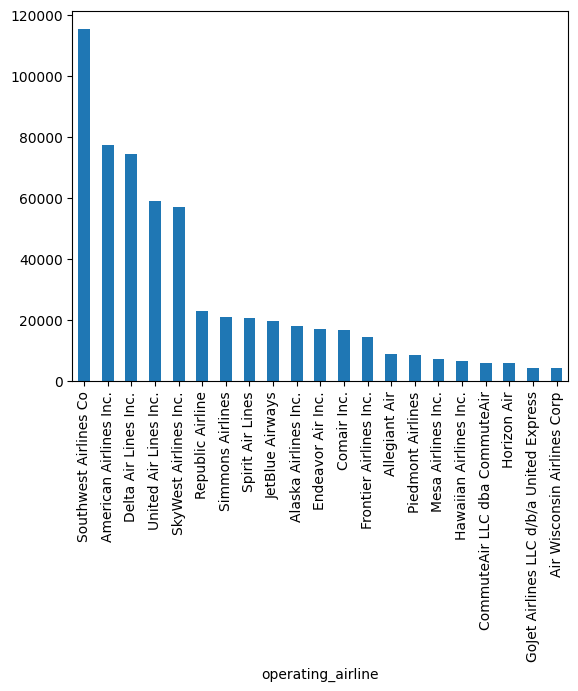

In [ ]:
Operating_Airline.plot.bar()

In [ ]:
print(Operating_Airline.index)
print()
print(Operating_Airline.values)

Index(['Southwest Airlines Co', 'American Airlines Inc.',
       'Delta Air Lines Inc.', 'United Air Lines Inc.',
       'SkyWest Airlines Inc.', 'Republic Airline', 'Simmons Airlines',
       'Spirit Air Lines', 'JetBlue Airways', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Comair Inc.', 'Frontier Airlines Inc.',
       'Allegiant Air', 'Piedmont Airlines', 'Mesa Airlines Inc.',
       'Hawaiian Airlines Inc.', 'CommuteAir LLC dba CommuteAir',
       'Horizon Air', 'GoJet Airlines LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp'],
      dtype='object', name='operating_airline')

[115389  77346  74384  58855  56811  22957  20750  20415  19580  17775
  16972  16525  14379   8596   8278   7180   6576   5820   5643   4196
   3998]


<Axes: xlabel='operating_airline'>

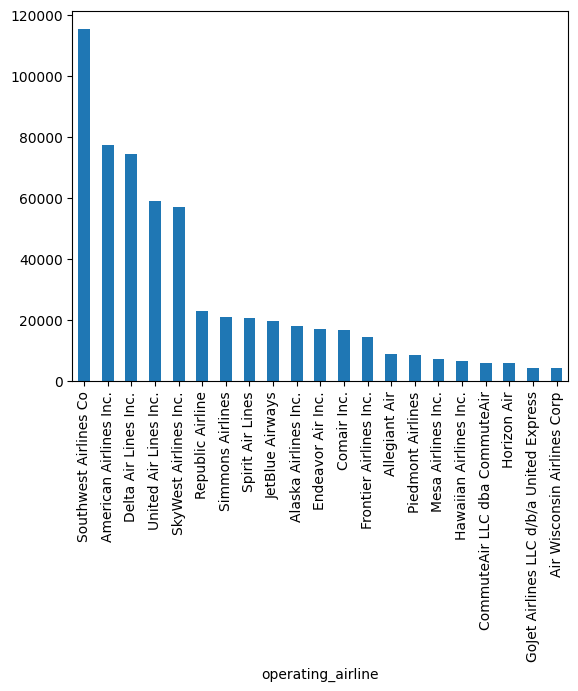

In [ ]:
#data plotting RGB(255, 255, 255)
Operating_Airline.plot.bar()
#Operating_Airline.plot.bar(color=['green', 'yellow', 'purple', 'blue', 'lightblue', 'teal', 'lightgreen'])
#Operating_Airline.plot.bar(color=['#9a6c35', '#a47a49', '#ae895d', '#b89871', '#c2a685', '#ccb59a', '#d6c4ae', '#e0d2c2', '#eae1d6', '#f4f0ea', '#e9b0f9', '#d19ee0', '#ba8cc7', '#a37bae', '#8b6995', '#c58940', '#e5b972', '#f9e9b0'])

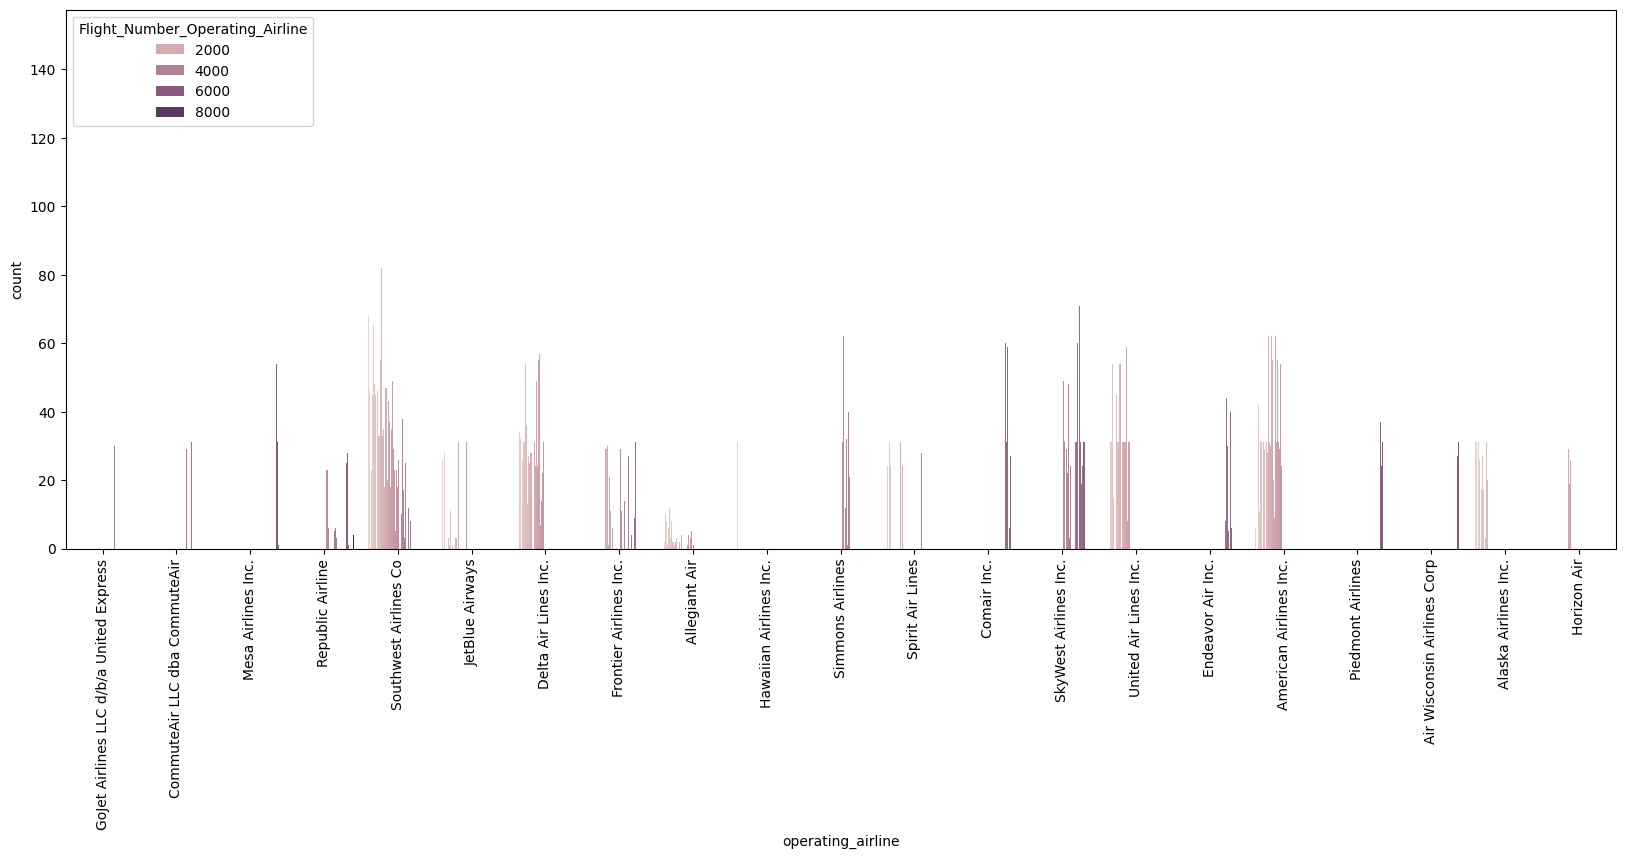

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x="operating_airline", hue="Flight_Number_Operating_Airline",  data=df1)
plt.xticks(rotation=90)
plt.show()

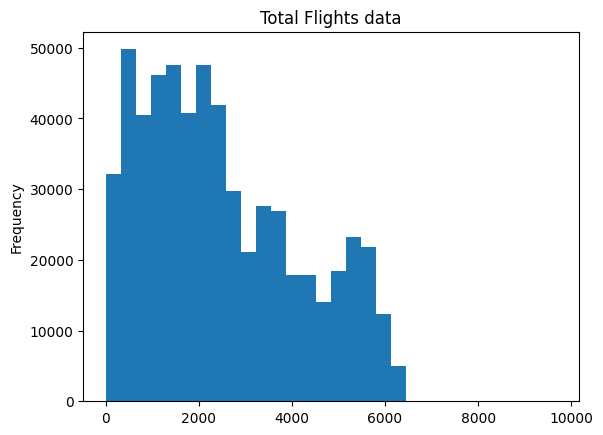

In [ ]:
df1["Flight_Number_Operating_Airline"].plot(
    kind="hist", bins=30, title="Total Flights data"
)
plt.show()

In [ ]:
print(df['Year'].dtype)
# Assuming df is your DataFrame and 'date_column' is the column you want to convert
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
print(df['FlightDate'].dtype)

int64
datetime64[ns]


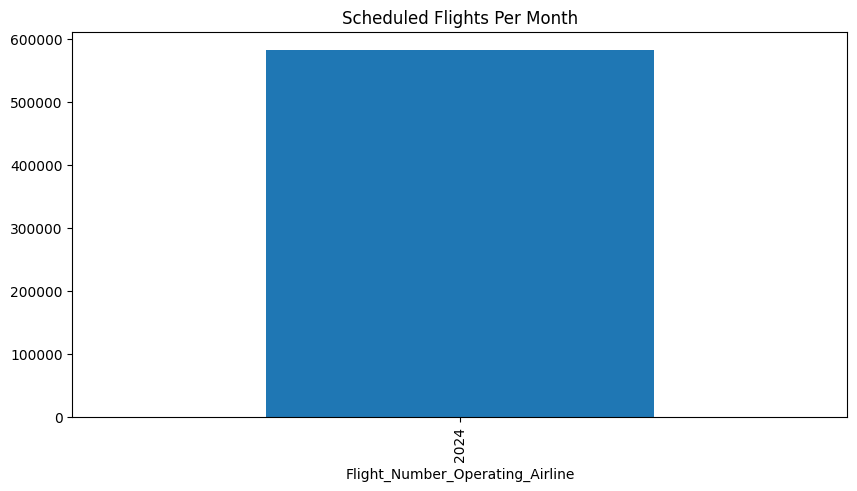

In [ ]:
df["Flight_Number_Operating_Airline"] = df['FlightDate'].dt.year
df["Flight_Number_Operating_Airline"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Month"
)
plt.show()

In [ ]:
#Bivariate Analysis
for group in df1.groupby('IATA_Code_Operating_Airline')['Flight_Number_Operating_Airline']:
  print(group)

('9E', 436816    4801
436817    4801
436818    4801
436819    4801
436820    4801
          ... 
453783    5536
453784    5536
453785    5536
453786    5540
453787    5540
Name: Flight_Number_Operating_Airline, Length: 16972, dtype: int64)
('AA', 453788       1
453789       1
453790       1
453791       1
453792       1
          ... 
531129    2457
531130    2457
531131    2457
531132    2457
531133    2457
Name: Flight_Number_Operating_Airline, Length: 77346, dtype: int64)
('AS', 543452       1
543453       2
543454       3
543455       4
543456       5
          ... 
561222    1325
561223    1327
561224    1328
561225    1461
561226    1462
Name: Flight_Number_Operating_Airline, Length: 17775, dtype: int64)
('B6', 145603    892
145604    896
145605    904
145606    907
145607    913
         ... 
582420    879
582421    880
582422    888
582423    890
582424    891
Name: Flight_Number_Operating_Airline, Length: 19580, dtype: int64)
('C5', 45        4376
46        4375
47        4374

In [ ]:
df1.groupby('IATA_Code_Operating_Airline')['Flight_Number_Operating_Airline'].mean()

,Flight_Number_Operating_Airline
IATA_Code_Operating_Airline,
9E,5155.571353
AA,1678.521501
AS,637.247370
B6,1179.072217
C5,4479.219931
DL,1613.129719
F9,2721.279435
G4,1316.614821
G7,4396.850095


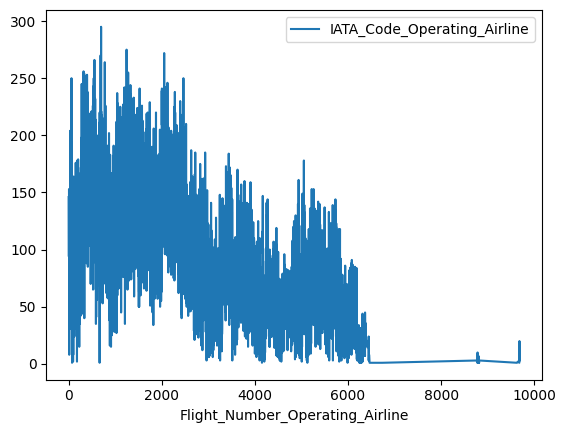

In [ ]:
df1[['IATA_Code_Operating_Airline','Flight_Number_Operating_Airline']].groupby(['Flight_Number_Operating_Airline']).count().plot()
plt.show()

In [ ]:
#Average , minimum & maximum flight details
df1.groupby('IATA_Code_Operating_Airline')['Flight_Number_Operating_Airline'].agg(['mean','min','max'])

,mean,min,max
IATA_Code_Operating_Airline,,,
9E,5155.571353,4801,5540
AA,1678.521501,1,2999
AS,637.247370,1,1497
B6,1179.072217,15,2995
C5,4479.219931,3255,5005
DL,1613.129719,12,8819
F9,2721.279435,18,4994
G4,1316.614821,1,6734
G7,4396.850095,3370,4610


In [ ]:
df1.isna().sum()

,0
FlightDate,0
Month,0
Flight_Number_Operating_Airline,0
Tail_Number,6276
IATA_Code_Operating_Airline,0
Origin,0
OriginCityName,0
OriginStateName,0
Dest,0
DestCityName,0


In [ ]:
df1.shape

(582425, 12)

<Axes: xlabel='IATA_Code_Operating_Airline'>

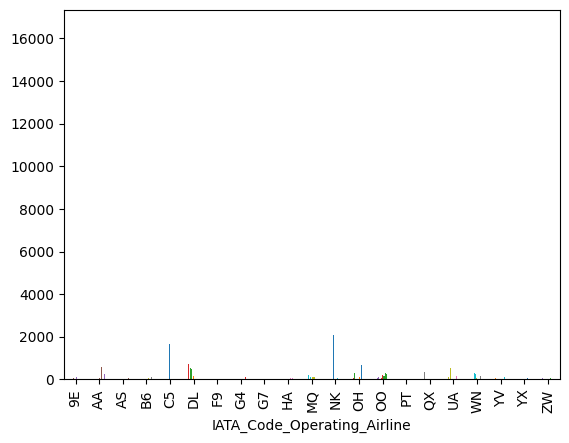

In [ ]:
pd.crosstab(df1['IATA_Code_Operating_Airline'] , df1['Origin']).plot.bar(legend=False)

In [ ]:
#frequency of each unique values in operating airlines
Origin_airport = df1['Origin'].value_counts()
Origin_airport

,count
Origin,
ATL,26363
DEN,24500
DFW,23743
ORD,22999
CLT,19126
PHX,15573
LAX,15341
LAS,15053
MCO,14296


In [ ]:
df1['Origin'].unique()

array(['MHT', 'IAD', 'EWR', 'STL', 'RIC', 'PQI', 'ORD', 'DCA', 'LNK',
       'SCE', 'ITH', 'MDT', 'IAH', 'CPR', 'HOB', 'TYS', 'COD', 'LBB',
       'SGF', 'DEN', 'LFT', 'MOB', 'BRO', 'HSV', 'MFE', 'JAN', 'LIT',
       'CHO', 'AMA', 'PNS', 'TUL', 'LCH', 'PVD', 'ROA', 'DRO', 'SAF',
       'BHM', 'CRP', 'MAF', 'ECP', 'GPT', 'ICT', 'CAE', 'ALB', 'DAY',
       'PHL', 'MSN', 'BUF', 'AVL', 'CLT', 'DTW', 'AVP', 'XNA', 'OMA',
       'ELP', 'OKC', 'DFW', 'SRQ', 'SDF', 'ATL', 'LGA', 'SAT', 'MSY',
       'AUS', 'RAP', 'PHX', 'PIT', 'TUS', 'PWM', 'JAX', 'MEM', 'IND',
       'MSP', 'SAV', 'HRL', 'BIL', 'MCI', 'BNA', 'IDA', 'GUC', 'SYR',
       'CLE', 'DSM', 'CVG', 'BZN', 'ABQ', 'BTR', 'CMH', 'BDL', 'LRD',
       'SHV', 'COS', 'ORF', 'FSD', 'GSO', 'ILM', 'RDU', 'GRR', 'ROC',
       'GRB', 'CHS', 'GJT', 'BTV', 'MTJ', 'PIA', 'SLC', 'MKE', 'TVC',
       'FNT', 'GSP', 'MLI', 'CID', 'CAK', 'PSP', 'RNO', 'RSW', 'SAN',
       'SBA', 'SEA', 'SFO', 'SJC', 'SJU', 'SMF', 'SNA', 'TPA', 'VPS',
       'BLI', 'BOI',

In [ ]:
df1['Origin'].value_counts()

,count
Origin,
ATL,26363
DEN,24500
DFW,23743
ORD,22999
CLT,19126
PHX,15573
LAX,15341
LAS,15053
MCO,14296


In [ ]:
df2 = df1.loc[((df1["Origin"] == 'SEA') & (df1["Dest"] == "EWR"))]
df3 = df1.loc[((df1["Origin"] == 'ATL') & (df1["Dest"] == "DEN"))]
df4 = df1.loc[((df1["Origin"] == 'IAD') & (df1["Dest"] == "JFK"))]
#df3 = df1.loc[df1["Origin"] == 'EWR']
#df4 = df1.loc[df1["Origin"] == 'ATL']
#df5 = df1.loc[df1["Origin"] == 'DEN']
frames = [df2,df3, df4]
#df2.shape
test_df = pd.concat(frames)
test_df.shape
#display(test_df)

(655, 12)

In [ ]:
test_df.head()

,Month,FlightDate,Flight_Number_Operating_Airline,Tail_Number,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,operating_airline
369107,1,2024-01-31,1399,N27274,UA,SEA,"Seattle, WA",Washington,EWR,"Newark, NJ",New Jersey,United Air Lines Inc.
369314,1,2024-01-31,1165,N58101,UA,SEA,"Seattle, WA",Washington,EWR,"Newark, NJ",New Jersey,United Air Lines Inc.
370964,1,2024-01-30,1399,N27287,UA,SEA,"Seattle, WA",Washington,EWR,"Newark, NJ",New Jersey,United Air Lines Inc.
371169,1,2024-01-30,1165,N21108,UA,SEA,"Seattle, WA",Washington,EWR,"Newark, NJ",New Jersey,United Air Lines Inc.
372874,1,2024-01-29,1399,N47291,UA,SEA,"Seattle, WA",Washington,EWR,"Newark, NJ",New Jersey,United Air Lines Inc.


In [ ]:
test_df['Origin'].value_counts()

Origin
ATL    470
SEA    129
IAD     56
Name: count, dtype: int64

In [ ]:
test_df['Dest'].value_counts()

Dest
DEN    470
EWR    129
JFK     56
Name: count, dtype: int64

<Axes: xlabel='Dest'>

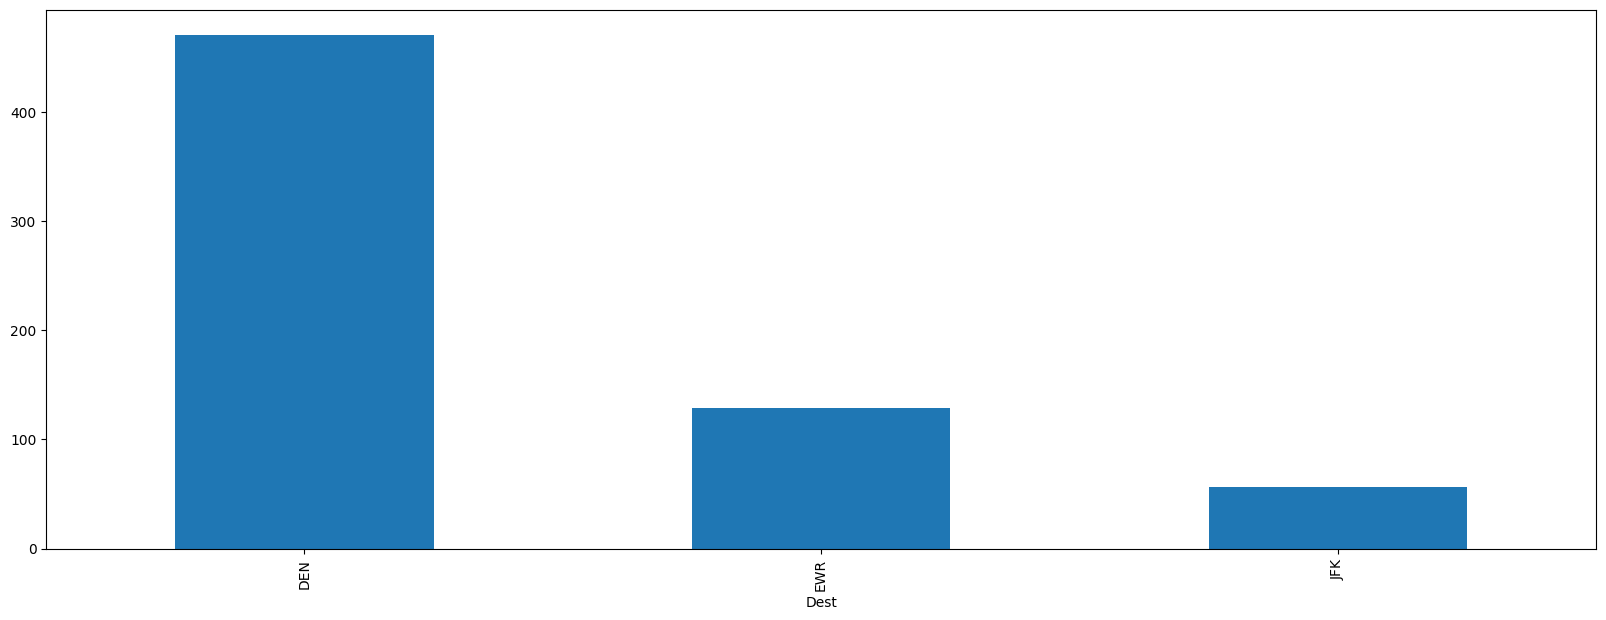

In [ ]:
plt.figure(figsize=(20,7))
test_df['Dest'].value_counts().plot.bar()

<Axes: xlabel='operating_airline'>

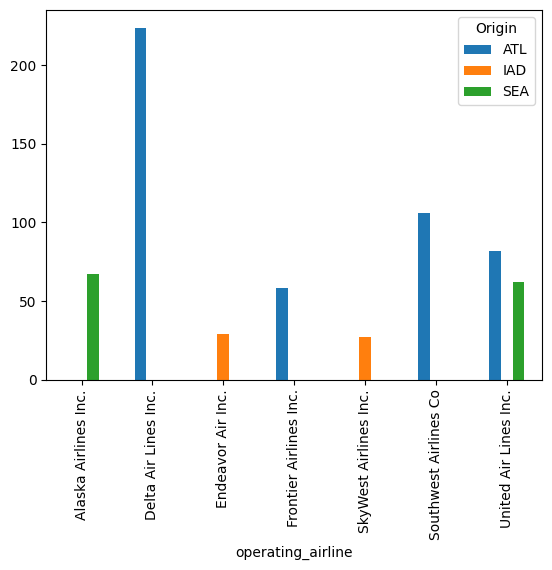

In [ ]:
pd.crosstab(test_df['operating_airline'] , test_df['Origin']).plot.bar()

In [ ]:
test_df = test_df.drop("FlightDate",axis=1)
#test_df = test_df.drop("DayofMonth",axis=1) #Converted to date

<Axes: xlabel='Origin'>

<Figure size 2800x1500 with 0 Axes>

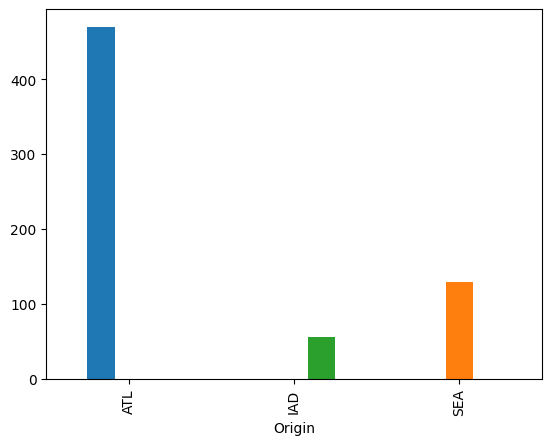

In [ ]:
plt.figure(figsize=(28,15))
pd.crosstab(test_df['Origin'] , test_df['Dest']).plot.bar(legend=False)

In [ ]:
#data plotting

#airport_1 = df1[df1['Origin'] == df1['Origin'][0]]
airport_1 = df1[df1['Origin'] == 'IAD']
airport_1.head()
#airport_1.shape
#airport_1.isna().sum()
#df1['Origin'][1]
#df1.Origin[0].plot.bar()

,Month,FlightDate,Flight_Number_Operating_Airline,Tail_Number,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,operating_airline
1,1,2024-01-14,4430,N535GJ,G7,IAD,"Washington, DC",Virginia,EWR,"Newark, NJ",New Jersey,GoJet Airlines LLC d/b/a United Express
49,1,2024-01-14,4370,N11184,C5,IAD,"Washington, DC",Virginia,RIC,"Richmond, VA",Virginia,CommuteAir LLC dba CommuteAir
51,1,2024-01-14,4364,N16170,C5,IAD,"Washington, DC",Virginia,CAE,"Columbia, SC",South Carolina,CommuteAir LLC dba CommuteAir
55,1,2024-01-14,4360,N14153,C5,IAD,"Washington, DC",Virginia,SYR,"Syracuse, NY",New York,CommuteAir LLC dba CommuteAir
76,1,2024-01-14,4331,NaN,C5,IAD,"Washington, DC",Virginia,BUF,"Buffalo, NY",New York,CommuteAir LLC dba CommuteAir


In [ ]:
org_airport1 = airport_1['Origin'].value_counts()
org_airport1

Origin
IAD    5613
Name: count, dtype: int64

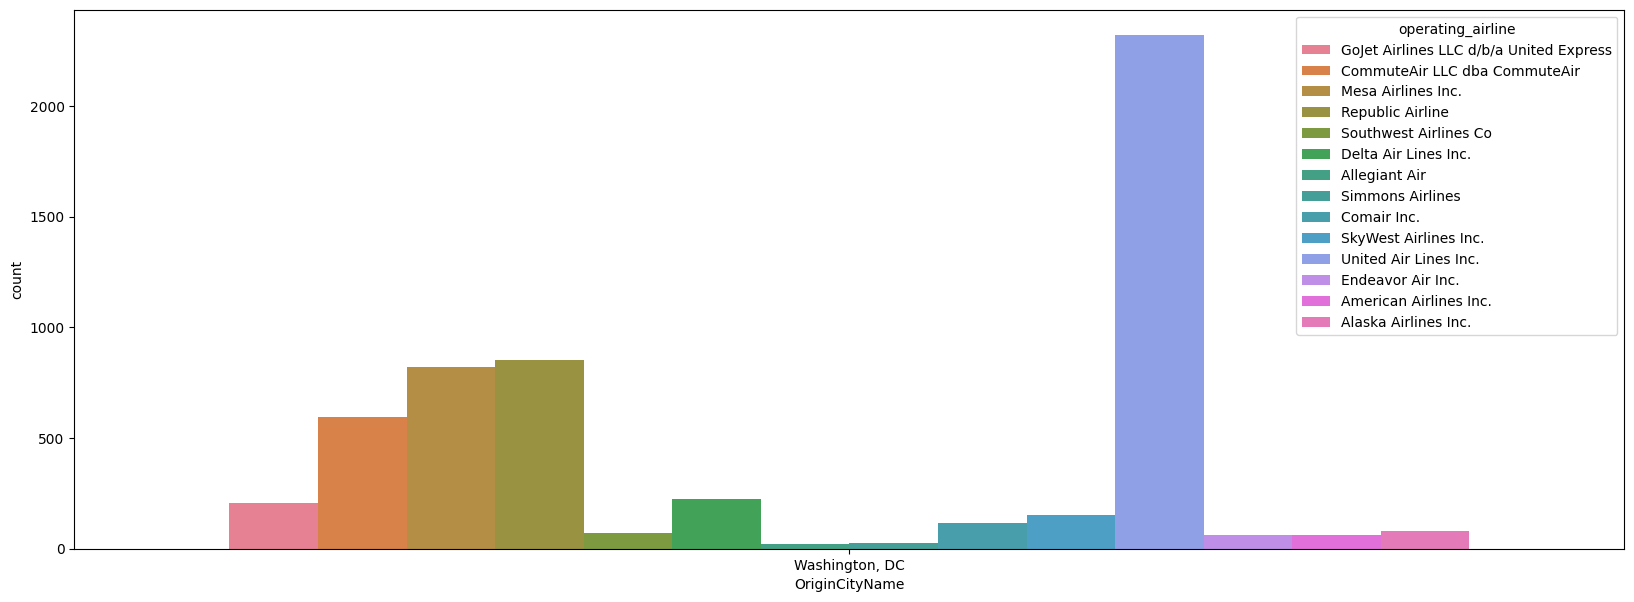

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x="OriginCityName", hue="operating_airline",  data=airport_1)
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='operating_airline'>

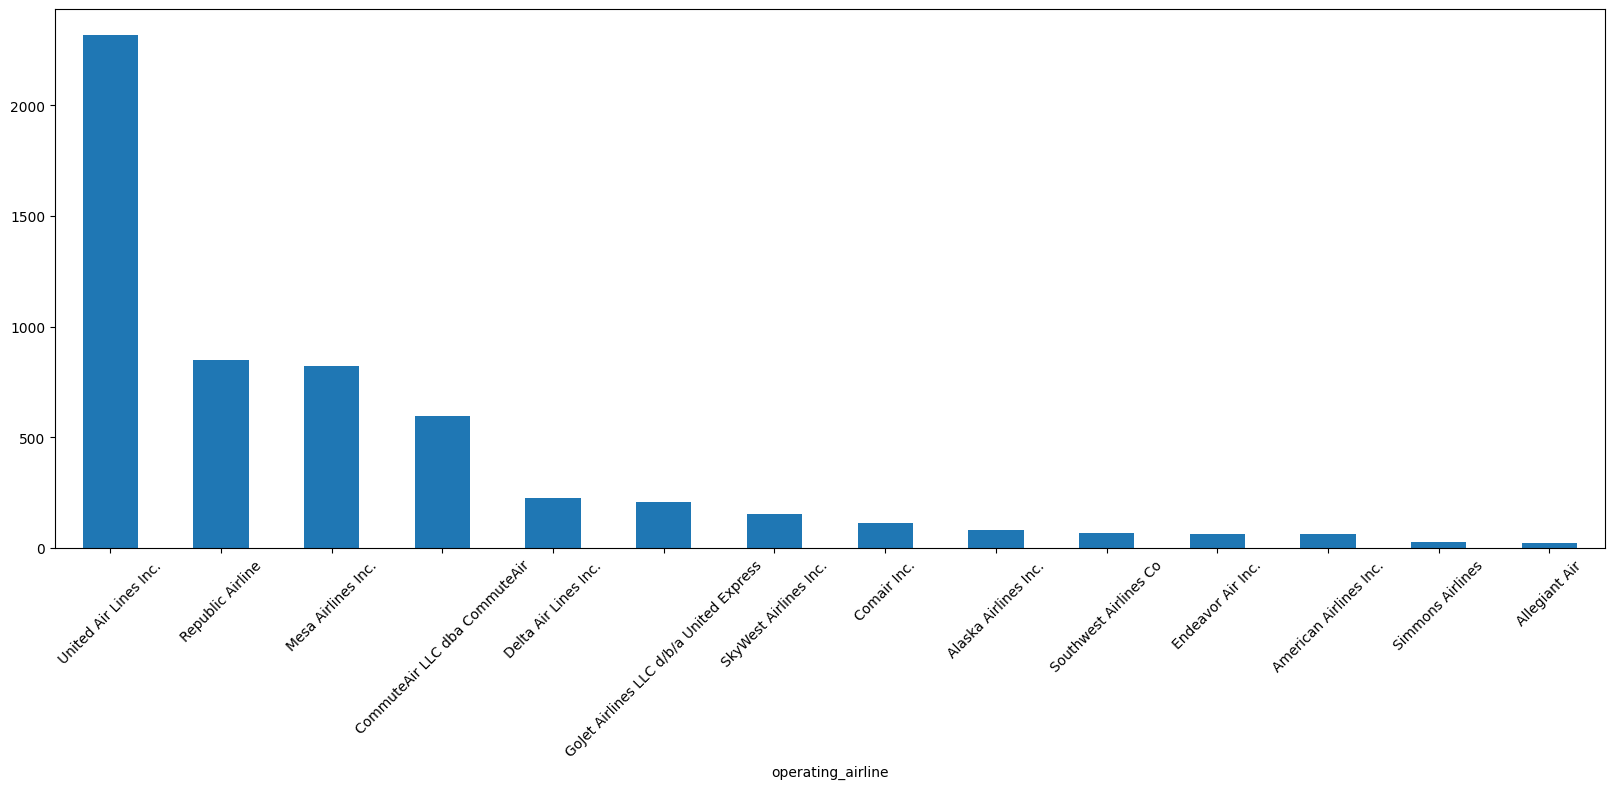

In [ ]:
plt.figure(figsize=(20,7))
airport_1['operating_airline'].value_counts().plot.bar(rot=45)

In [ ]:
airlines = df1['IATA_Code_Operating_Airline'].unique()
print(len(airlines))

21


In [ ]:
Operating_airlines_1 = df1[df1['IATA_Code_Operating_Airline'] == df1['IATA_Code_Operating_Airline'][0]]
#airport_1 = df1[df1['Origin'] == 'SEA']
Operating_airlines_2 = df1[df1['IATA_Code_Operating_Airline'] == df1['IATA_Code_Operating_Airline'][1]]
Operating_airlines_1.head()

,Month,FlightDate,Flight_Number_Operating_Airline,Tail_Number,IATA_Code_Operating_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,operating_airline
0,1,2024-01-14,4432,N535GJ,G7,MHT,"Manchester, NH",New Hampshire,EWR,"Newark, NJ",New Jersey,GoJet Airlines LLC d/b/a United Express
1,1,2024-01-14,4430,N535GJ,G7,IAD,"Washington, DC",Virginia,EWR,"Newark, NJ",New Jersey,GoJet Airlines LLC d/b/a United Express
2,1,2024-01-14,4429,N535GJ,G7,EWR,"Newark, NJ",New Jersey,MHT,"Manchester, NH",New Hampshire,GoJet Airlines LLC d/b/a United Express
3,1,2024-01-14,4428,N547GJ,G7,STL,"St. Louis, MO",Missouri,ORD,"Chicago, IL",Illinois,GoJet Airlines LLC d/b/a United Express
4,1,2024-01-14,4427,N504GJ,G7,STL,"St. Louis, MO",Missouri,IAD,"Washington, DC",Virginia,GoJet Airlines LLC d/b/a United Express


In [ ]:
oper_airline_1 = Operating_airlines['IATA_Code_Operating_Airline'].value_counts()
oper_airline_1

IATA_Code_Operating_Airline
G7    4196
Name: count, dtype: int64

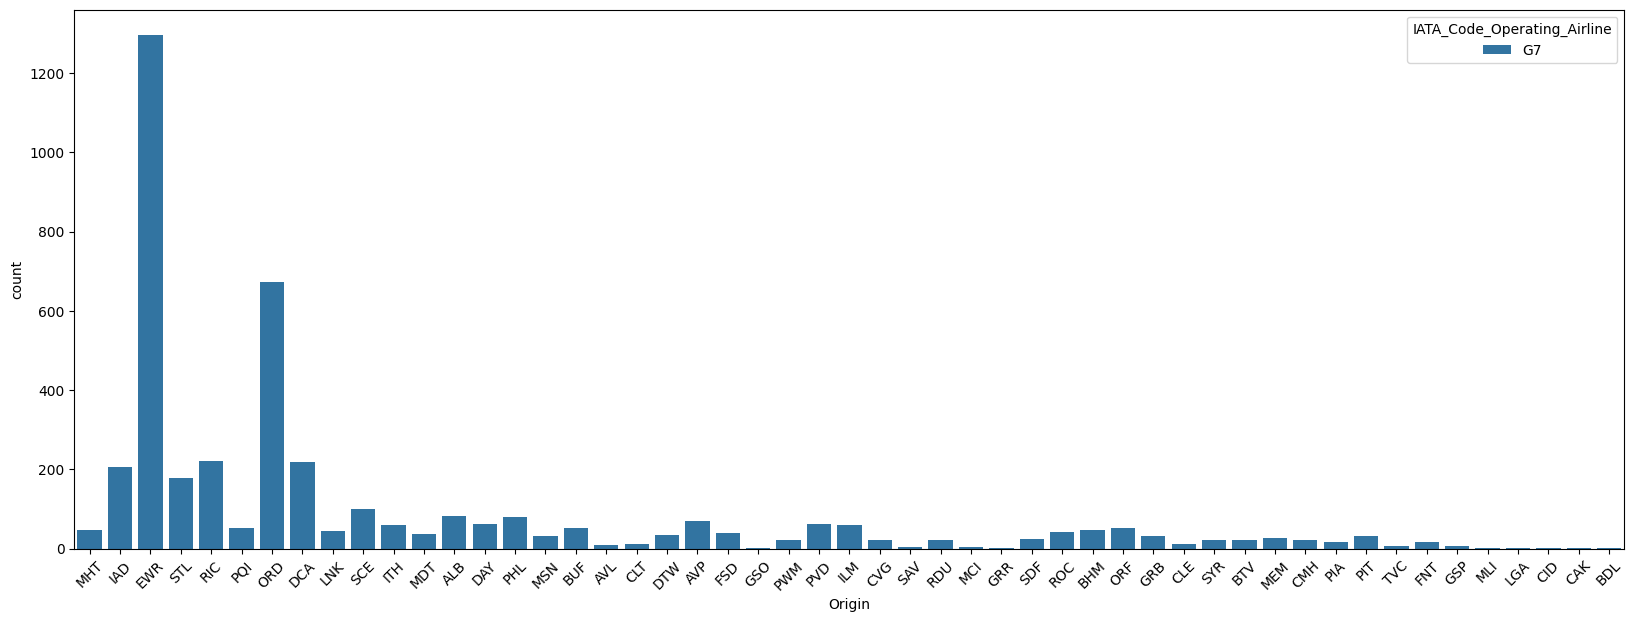

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x="Origin", hue="IATA_Code_Operating_Airline",  data=Operating_airlines)
plt.xticks(rotation=45)
plt.show()

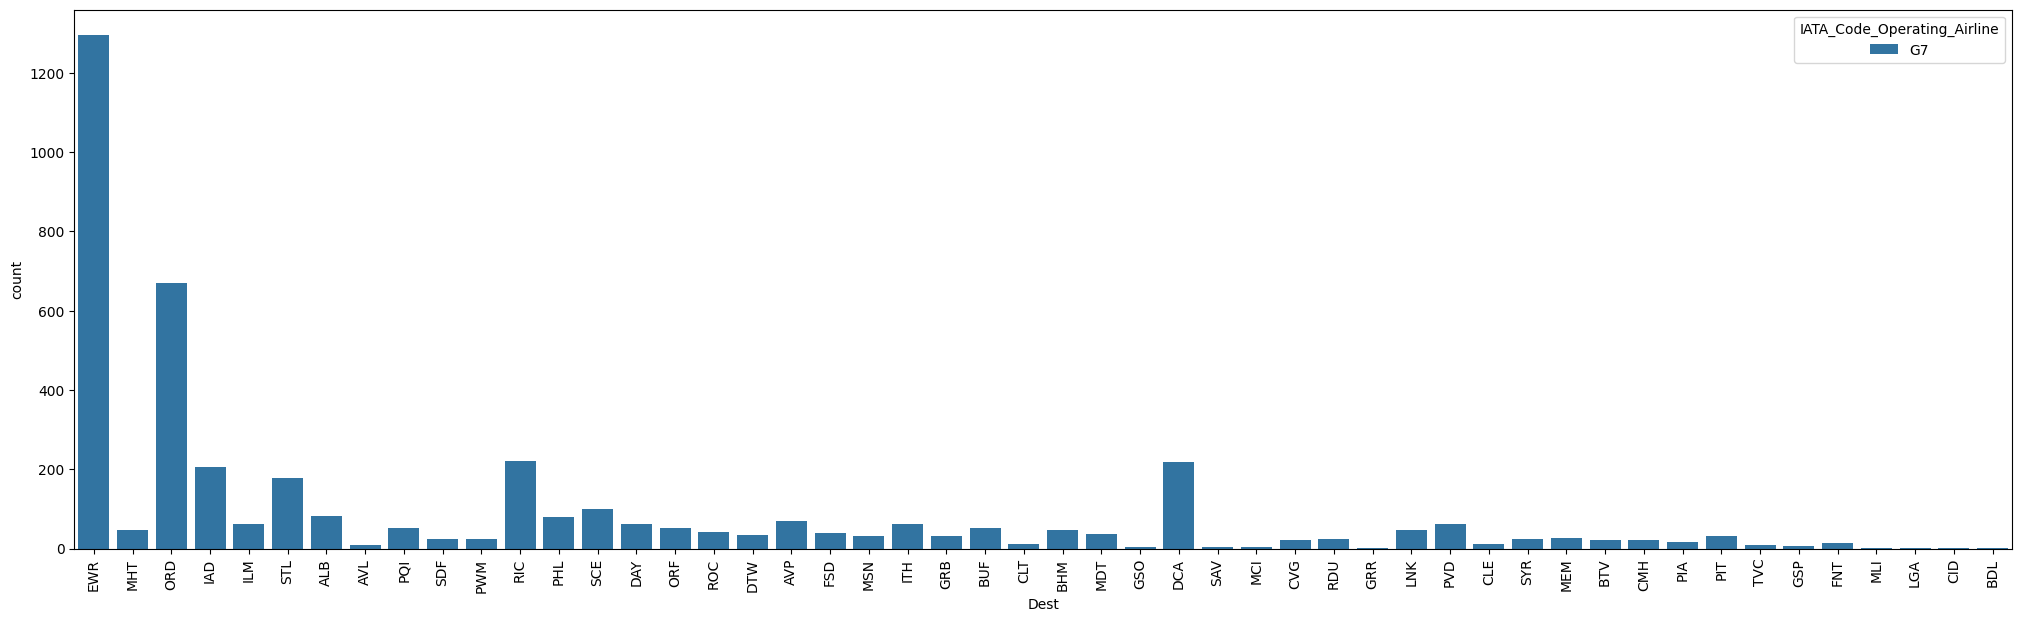

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot(x="Dest", hue="IATA_Code_Operating_Airline",  data=Operating_airlines)
plt.xticks(rotation=90)
plt.show()

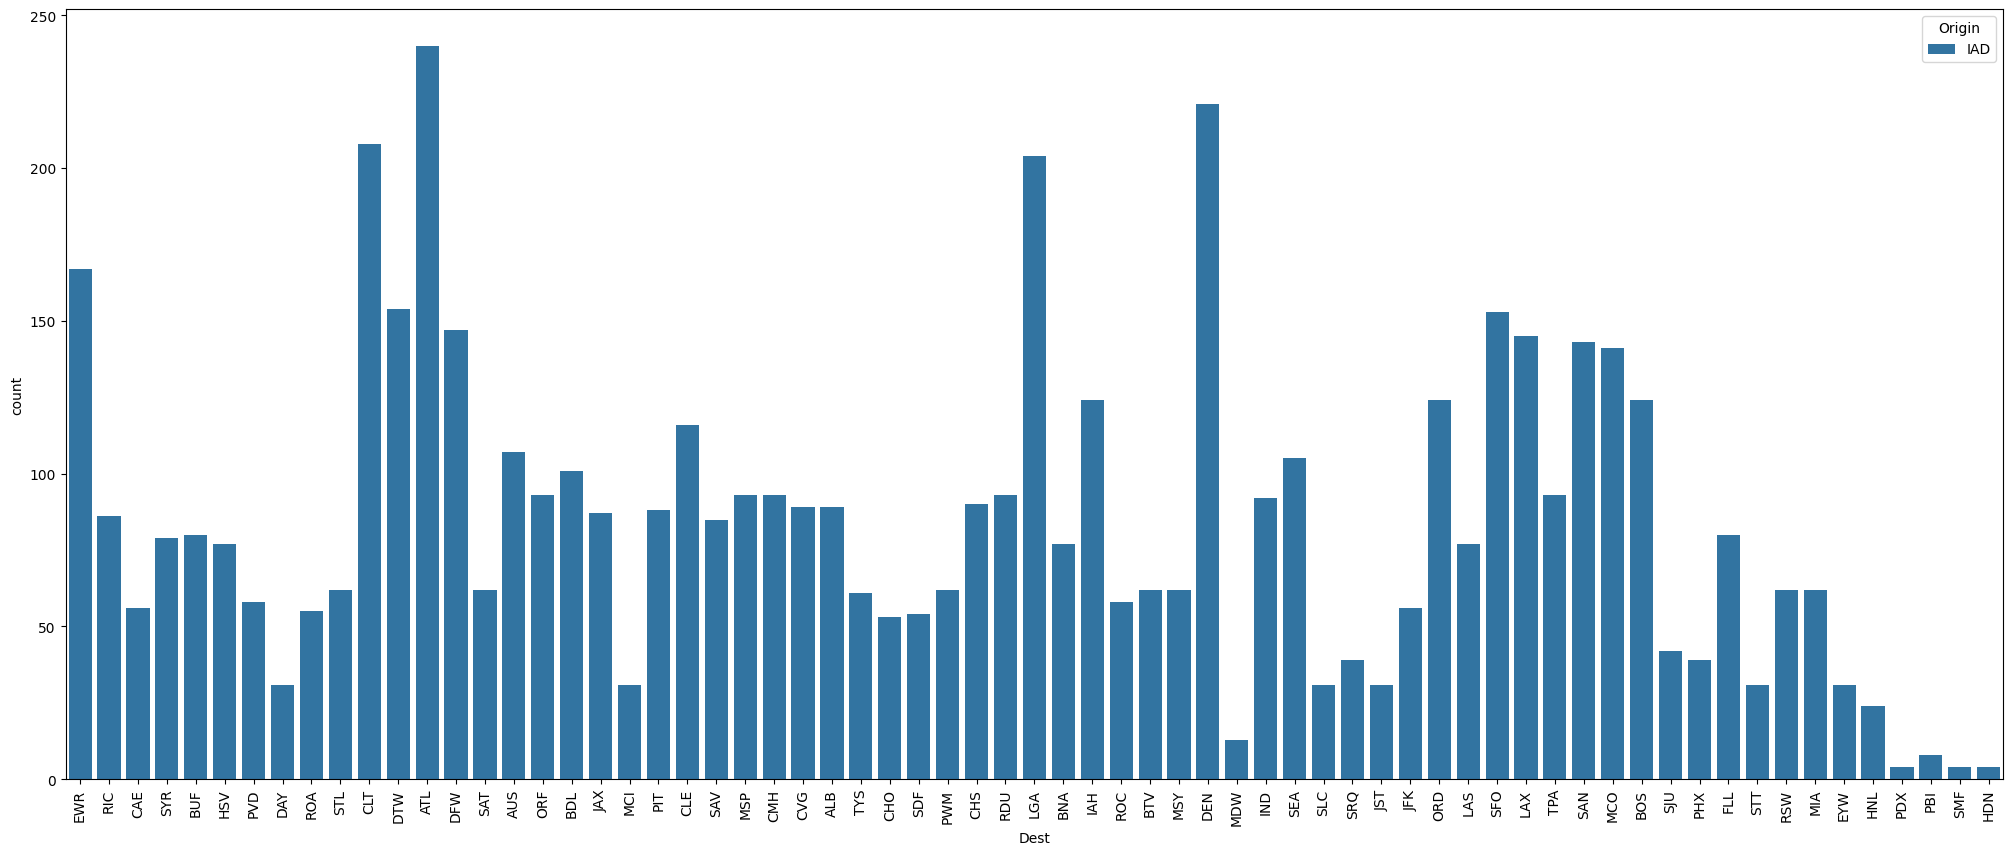

In [ ]:
plt.figure(figsize=(25,10))

sns.countplot(x="Dest", hue="Origin", data=airport_1)
plt.xticks(rotation=90)
#legend=False
#plt.legend(loc='lower center', title = "Routes")
#plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
plt.show()

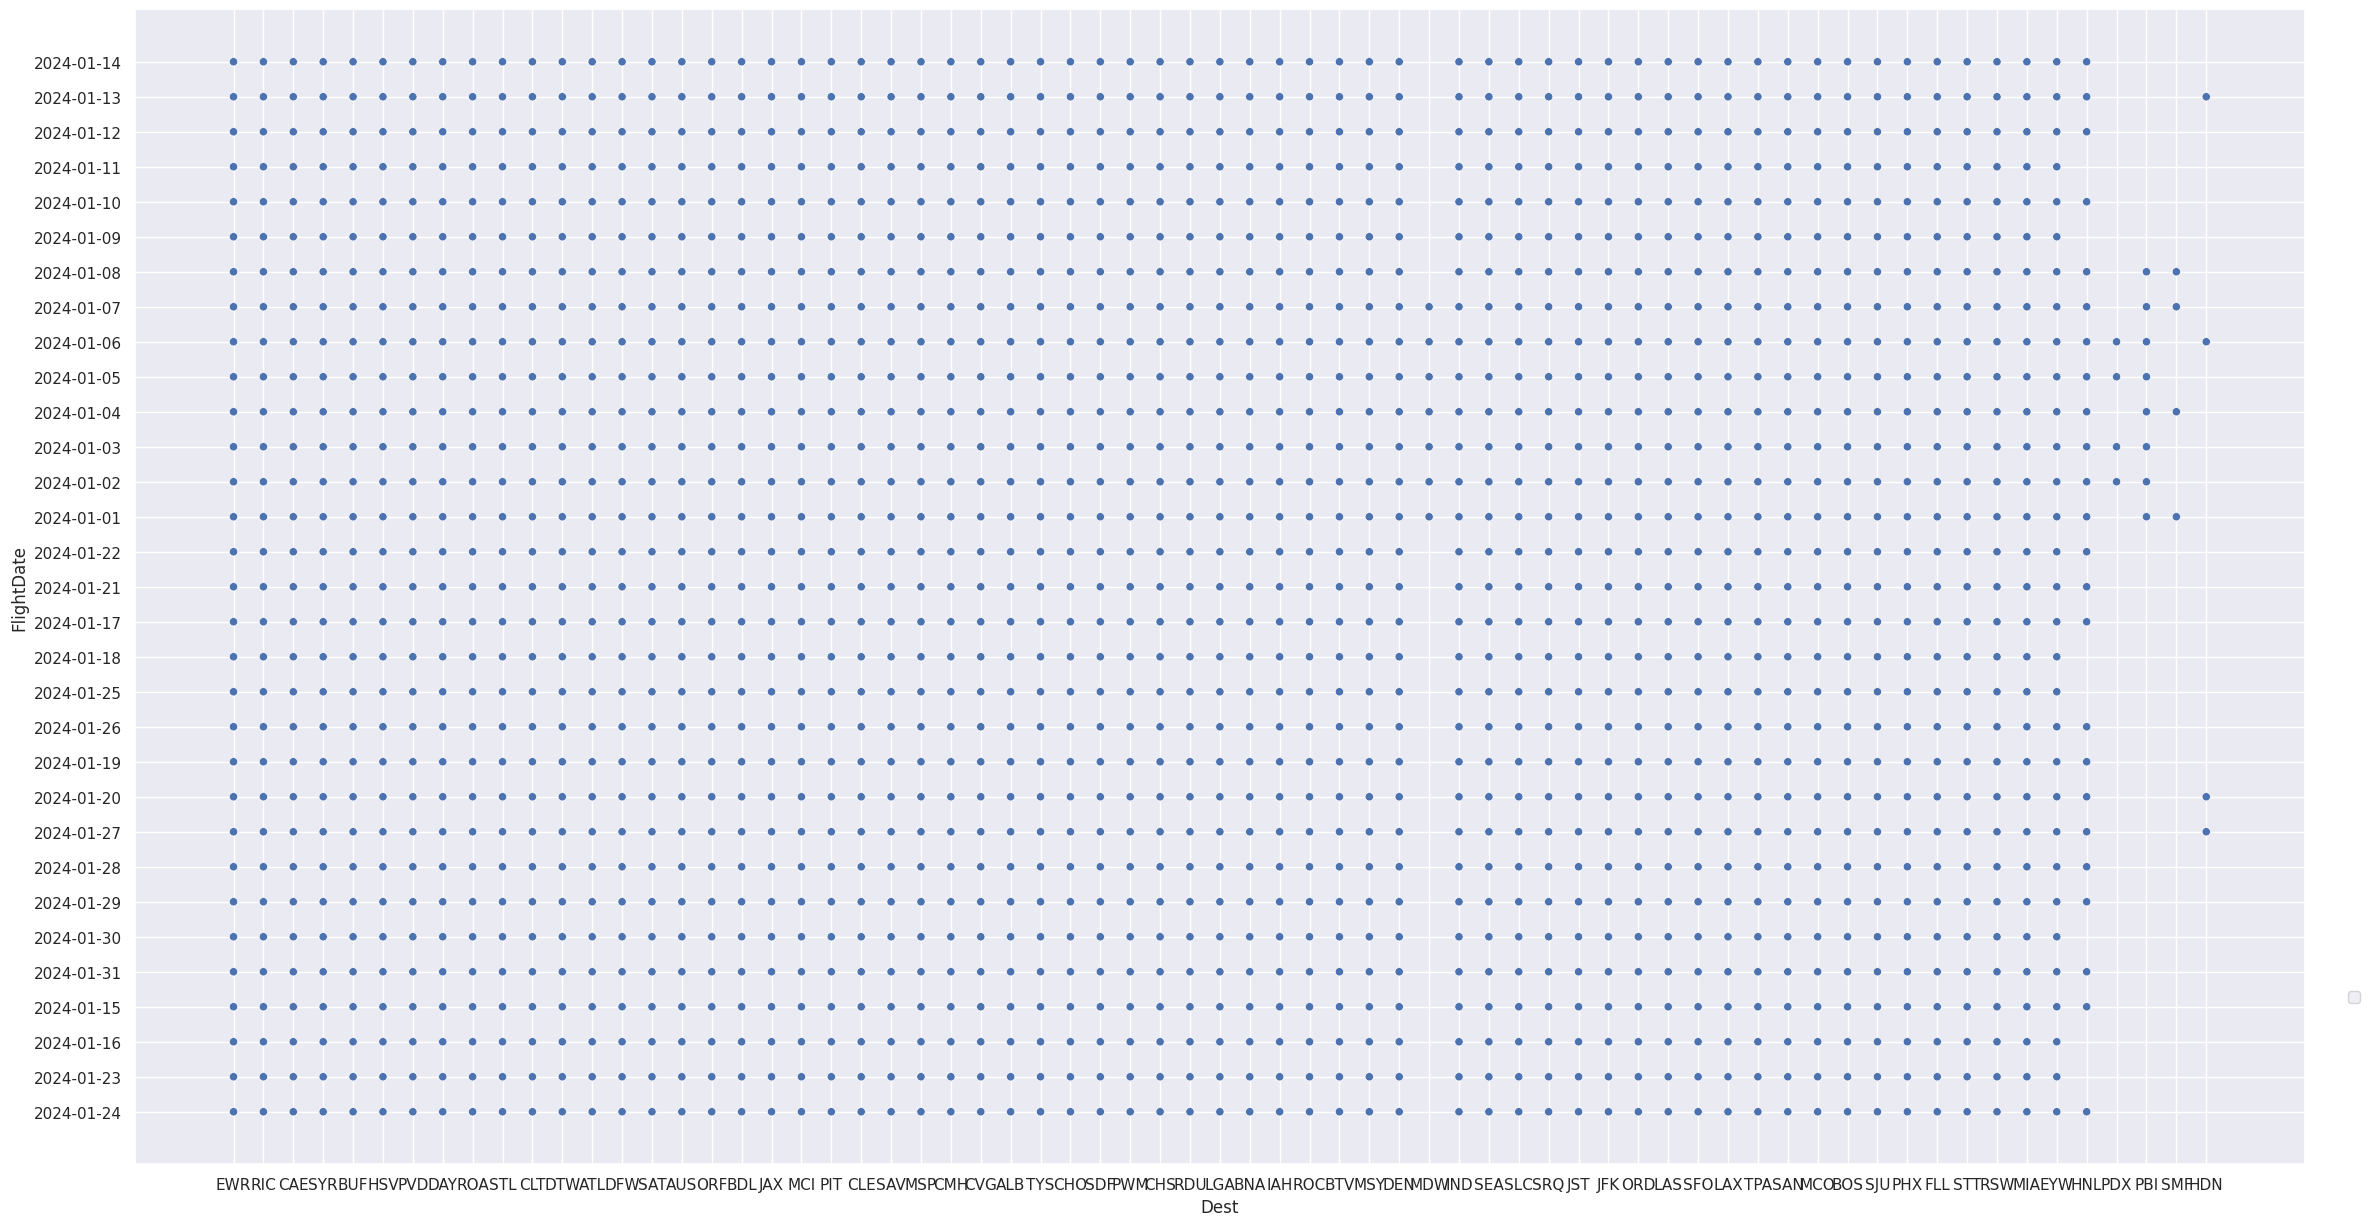

In [ ]:
#create scatterplot
plt.figure(figsize=(28,15))
#sns.scatterplot(data=df1, x='Dest', y='Origin', hue='FlightDate')
sns.scatterplot(data=airport_1, x='Dest', y='FlightDate', hue='Origin', legend=False)
#place legend outside bottom right corner of plot
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0)
#scatterplot
plt.show()